In [1]:
!pip install yfinance

     ---------------------------------------- 65.6/65.6 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 9.5 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 8.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135767 sha256=ad52764fbf133f46d60c7b0d3b158745786d04e4ce1c2a6f1a57a61733a36678
  Stored in directory: c:\users\wdd45\appdata\local\pip\cache\wheels\3d\94\75\04466de49ad673d7f0fc420ad799701870e63a3b833387d2f4
Successfully built peewee


In [2]:
import yfinance as yf
df = yf.download('005930.KS','2021-06-03','2022-06-03')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,81300.0,83000.0,81100.0,82800.0,78860.304688,29546007
2021-06-04,82700.0,82700.0,81500.0,82200.0,78288.835938,18112259
2021-06-07,82700.0,82800.0,81600.0,81900.0,78003.132812,16496197
2021-06-08,82300.0,82600.0,81800.0,81900.0,78003.132812,12781226
2021-06-09,81500.0,82000.0,81100.0,81100.0,77241.179688,14908823
...,...,...,...,...,...,...
2022-05-26,66300.0,67200.0,65500.0,65900.0,63956.929688,15970890
2022-05-27,66700.0,66900.0,66200.0,66500.0,64539.234375,11405555
2022-05-30,67500.0,67800.0,66900.0,67700.0,65703.851562,14255484


In [4]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 'Close' 가격 추출 (다른 열도 사용할 수 있음)
data = df['Close'].values.reshape(-1, 1)


In [8]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [9]:
# 시계열 데이터의 시퀀스를 생성하는 함수 정의
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)


In [10]:
# 시퀀스 길이를 설정하고 데이터를 훈련 및 테스트 세트로 분할
sequence_length = 10
sequences = create_sequences(data, sequence_length)
X = sequences[:, :-1]
y = sequences[:, -1]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 3s 18ms/step - loss: 0.3592
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3300
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 0.3038
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2789
Epoch 5/50
3/3 [==============================] - 0s 11ms/step - l

In [14]:
# 모델 평가
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.4f}")
print(f"테스트 손실: {test_loss:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
훈련 손실: 0.0076
테스트 손실: 0.0044


In [15]:
# 예측 생성
predicted = model.predict(X_test)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 6ms/step


In [16]:

# 실제 주식 가격을 얻기 위해 데이터를 역변환합니다
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


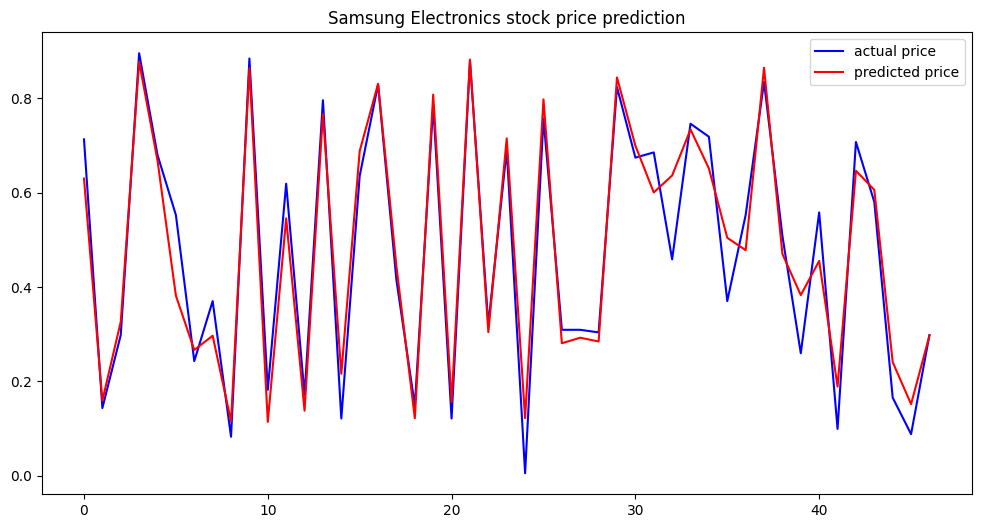

In [18]:
# 결과를 그래프로 나타냅니다
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='actual price', color='blue')
plt.plot(predicted, label='predicted price', color='red')
plt.title('Samsung Electronics stock price prediction')
plt.legend()
plt.show()

In [20]:
###################################GRU모델 #################################

In [26]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download('005930.KS', '2021-06-03', '2022-06-03')

# 'Close' 가격 추출 (다른 열도 사용할 수 있음)
data = df['Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [27]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [28]:
# 시계열 데이터의 시퀀스를 생성하는 함수 정의
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

In [29]:
# 시퀀스 길이를 설정하고 데이터를 훈련 및 테스트 세트로 분할
sequence_length = 10
sequences = create_sequences(data, sequence_length)
X = sequences[:, :-1]
y = sequences[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# GRU 모델 생성
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(sequence_length-1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - 1s 5ms/step - loss: 0.2995
Epoch 2/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2600
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.2234
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.1901
Epoch 5/50
3/3 [==============================] - 0s 6ms/step - loss: 

In [32]:
# 모델 평가
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"훈련 손실: {train_loss:.4f}")
print(f"테스트 손실: {test_loss:.4f}")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
훈련 손실: 0.0045
테스트 손실: 0.0026


In [33]:
# 예측 생성
predicted = model.predict(X_test)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 2ms/step


In [34]:
# 실제 주식 가격을 얻기 위해 데이터를 역변환합니다
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


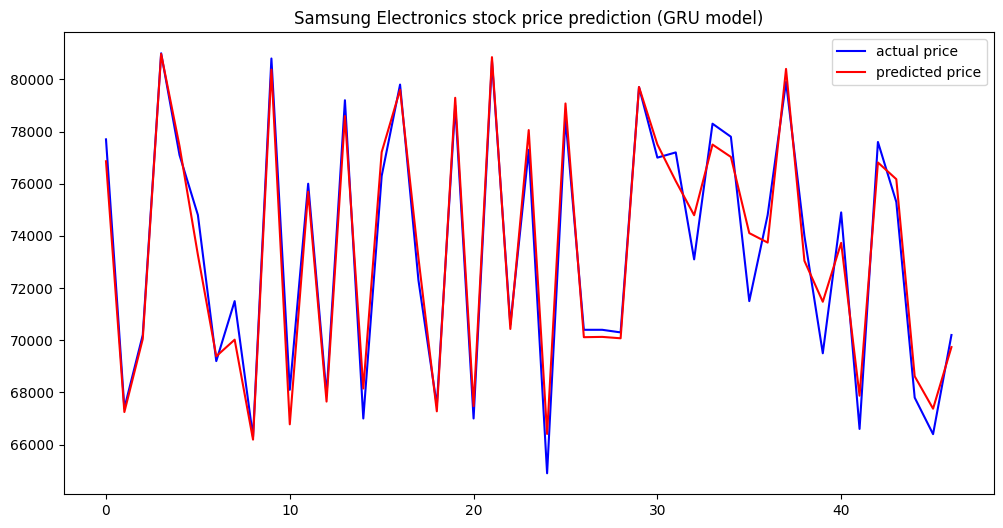

In [35]:
# 결과를 그래프로 나타냅니다
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='actual price', color='blue')
plt.plot(predicted, label='predicted price', color='red')
plt.title('Samsung Electronics stock price prediction (GRU model)')
plt.legend()
plt.show()

In [58]:
#####################CNN모델##################################

In [62]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 데이터 다운로드
df = yf.download('005930.KS', '2021-06-03', '2022-06-03')

# 'Close' 가격 추출
data = df['Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [63]:
data

array([[82800.],
       [82200.],
       [81900.],
       [81900.],
       [81100.],
       [81000.],
       [81000.],
       [80500.],
       [80900.],
       [81800.],
       [80900.],
       [80500.],
       [79900.],
       [80000.],
       [80100.],
       [81200.],
       [81600.],
       [81900.],
       [81000.],
       [80700.],
       [80100.],
       [80000.],
       [80400.],
       [81200.],
       [80800.],
       [79900.],
       [79400.],
       [79700.],
       [79800.],
       [79500.],
       [80600.],
       [79800.],
       [79000.],
       [79000.],
       [78500.],
       [79700.],
       [79300.],
       [78800.],
       [78500.],
       [79200.],
       [79000.],
       [78500.],
       [79300.],
       [81400.],
       [82900.],
       [82100.],
       [81500.],
       [81500.],
       [80200.],
       [78500.],
       [77000.],
       [74400.],
       [74200.],
       [73900.],
       [73100.],
       [72700.],
       [73300.],
       [75600.],
       [75700.

In [64]:
# 데이터 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [65]:
# 데이터를 이미지로 변환
sequence_length = 10  # 10일 동안의 데이터를 이미지로 표현
image_data = []
target_data = []
for i in range(len(data) - sequence_length):
    sequence = data[i:i+sequence_length]
    image_data.append(sequence)
    target_data.append(data[i+sequence_length])

image_data = np.array(image_data)
target_data = np.array(target_data)

In [66]:
# 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 1), activation='relu', input_shape=(sequence_length, 1, 1)))
model.add(MaxPooling2D((2, 1)))  # MaxPooling2D 크기를 조절
model.add(Flatten())
model.add(Dense(1, activation='linear'))


In [67]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')


In [68]:
# 모델 훈련
model.fit(image_data, target_data, epochs=50, batch_size=32)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 1s 2ms/step - loss: 0.3981
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1867
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1127
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 

In [69]:
# 예측
predicted = model.predict(image_data)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 0s 1ms/step


In [70]:
# 실제 주식 가격을 역변환
predicted = scaler.inverse_transform(predicted)
target_data = scaler.inverse_transform(target_data)


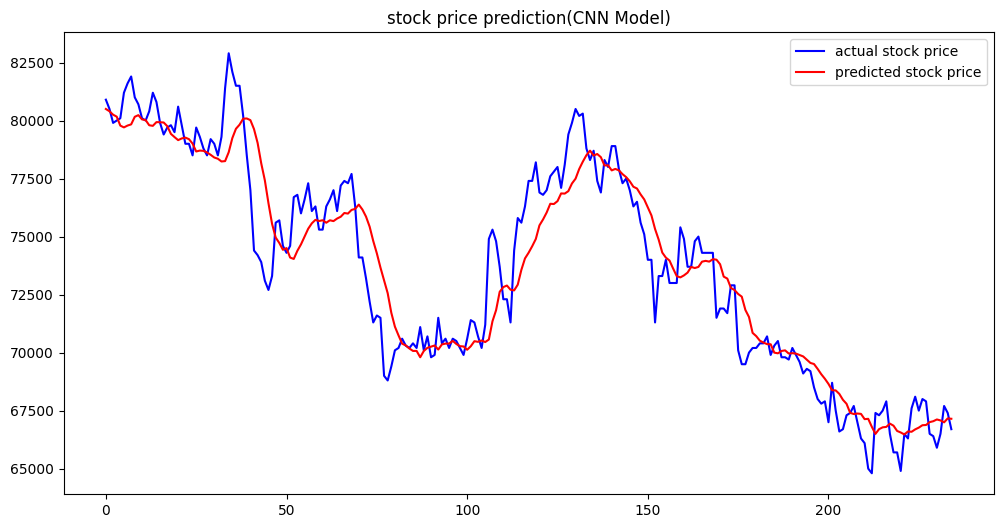

In [71]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(target_data, label='actual stock price', color='blue')
plt.plot(predicted, label='predicted stock price', color='red')
plt.title('stock price prediction(CNN Model)')
plt.legend()
plt.show()